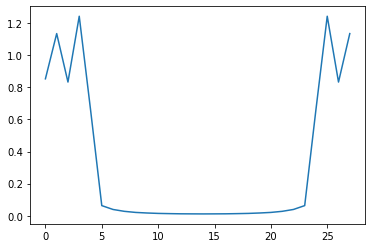

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from scipy.linalg import hankel
 
N = 31 # `N = 31` : The length of the filter. 
M = (N - 1) // 2
 
wp = 0.26 * np.pi # The passband and stopband edge frequencies, respectively, in radians per sample.
ws = 0.34 * np.pi # The stopband edge frequencies, respectively, in radians per sample.
K = 10 # The weight factor used in the Parks-McClellan algorithm.
 
fp = wp / np.pi # The passband and stopband edge frequencies normalized to the Nyquist frequency.
fs = ws / np.pi
 
nn=np.arange(1,(2*M))
 
q = np.hstack(((fp+K*(1-fs)), (fp*np.sinc(fp*nn)-K*fs*np.sinc(fs*nn)))); # `q` : The desired frequency response of the filter in the passband and stopband.
# The first element is the frequency band edge weight, and the remaining elements are the desired frequency response.

Q1 = toeplitz(q[0:M])
Q2 = hankel(q[0:M], q[M:(2 * M) ])
Q =(Q1+Q2)/2 # `Q` : The toeplitz and hankel matrix used to solve for the filter coefficients.
 
b = fp * np.sinc(fp * np.arange(M )) # `b` : The desired response of the filter in the passband. It is generated using the sinc function.
 
a = np.linalg.solve(Q, b) # `a` : The filter coefficients are computed by solving the system of linear equations `Qa=b` using the `linalg.solve` function.
A1 = a[M-1:0:-1][1:] # `A1`, `A2`, and `A3` : The filter coefficients are then sliced into three parts and concatenated.
A2 = np.array([2 * a[0]])  # Convert to 1D array
A3 = a[1:M]
 
# Now, concatenate the slices
h = np.concatenate((A1, A2, A3)) / 2 # `h` : The final lowpass FIR filter coefficients.
# plt.stem(h)
h_fft=np.fft.fft(h)
plt.plot(abs(h_fft))